In [1]:
import psycopg2
from src.features.text.tokenize import tokenize
from src.visualization import topics
from collections import defaultdict
from gensim import corpora, models
import os
#import pyLDAvis.gensim
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/Users/claasmeiners/.virtualenvs/video_article_retrieval/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
corpus = corpora.MmCorpus(os.environ['MODEL_PATH'] + 'articles.mm')
dictionary = corpora.Dictionary.load(os.environ['MODEL_PATH'] + 'articles.dict')
num_topics = 10

In [3]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

In [4]:
lda.save(os.environ['MODEL_PATH'] + 'articles.lda')

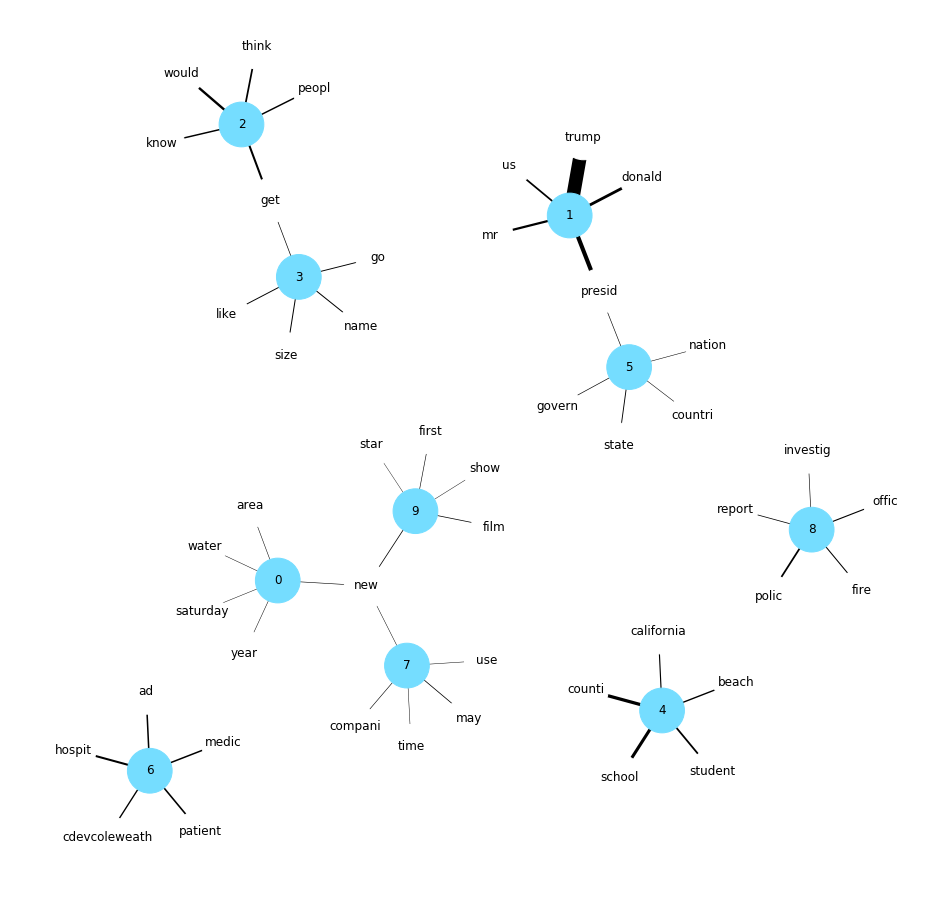

In [7]:
plt.figure(figsize=(16,16))

topics.topic_network_graph(lda, dictionary, num_topics)

plt.axis('off')
plt.savefig('lda_network_graph.pdf', format="pdf",bbox_inches='tight')
plt.show()

In [109]:
topics.print_topics(lda, dictionary, num_topics)


0: water (0.0360), boat (0.0225), sea (0.0137), island (0.0129), beach (0.0124), 
1: polic (0.0177), fire (0.0131), offic (0.0106), man (0.0068), home (0.0065), 
2: size (0.0341), mappingadds (0.0123), fals (0.0106), function (0.0101), e (0.0098), 
3: like (0.0100), go (0.0080), get (0.0078), would (0.0069), time (0.0062), 
4: new (0.0065), year (0.0060), compani (0.0045), use (0.0044), provid (0.0030), 
5: pm (0.0244), may (0.0196), mr (0.0155), trade (0.0151), prime (0.0122), 
6: trump (0.0231), presid (0.0140), state (0.0100), mr (0.0082), court (0.0075), 
7: video (0.0154), music (0.0105), name (0.0102), post (0.0099), show (0.0092), 
8: israel (0.0183), palestinian (0.0112), isra (0.0111), day (0.0073), pay (0.0070), 
9: countri (0.0084), govern (0.0084), minist (0.0070), state (0.0064), peopl (0.0060), 

In [ ]:
#followers_data =  pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#pyLDAvis.display(followers_data)